# Paquetes

In [1]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import tldextract

# Datasets

## Datasets Valids

Usando los datasets obtenidos y generamos podemos unirlos para generar un dataset completo para la detección de phishing.

In [2]:
data_phish_valid1 = pd.read_csv('Datasets/verified_online.csv')
data_phish_valid1['phishing'] = np.ones(data_phish_valid1.shape[0])
data_phish_valid1 = data_phish_valid1[['url','phishing']]
data_phish_valid1

,url,phishing
0,http://populaire-pro-dsp.com/PopIbet/app.html,1.0
1,https://talkingtree.staging-technologies.com/v...,1.0
2,https://yahoopdf.yolasite.com/,1.0
3,https://www4.sndc-crad-nem-inedx.scottfaraday1.cn,1.0
4,https://annzon-ihbsf-co-jp.mbhcxy.buzz/,1.0
...,...,...
11102,http://gkjx168.com/images,1.0
11103,http://www.habbocreditosparati.blogspot.com/,1.0
11104,http://creditiperhabbogratissicuro100.blogspot...,1.0
11105,http://mundovirtualhabbo.blogspot.com/2009_01_...,1.0


In [93]:
data_phish_valid1.iloc[60:80]

,url,phishing
60,https://modest-cohen.46-20-34-168.plesk.page/r27/,1.0
61,http://serviceagf.temp.swtest.ru/wp-content/la...,1.0
62,https://socialmediamarkettiers.com/wp-kxjk/office,1.0
63,https://socialmediamarkettiers.com/wp-kxjk/off...,1.0
64,http://newxxporn-virals83.duckdns.org/,1.0
65,https://dennybegle.com/netbankar/mkb.hu/mkbnet...,1.0
66,https://dennybegle.com/netbankar/mkb.hu/mkbnet...,1.0
67,https://housestoneltd.com/sal/ggg/china/?login...,1.0
68,https://www.logobirds.com/wp-content/plugins/n...,1.0
69,https://www.logobirds.com/wp-content/plugins/n...,1.0


In [3]:
data_phish_valid2 = pd.read_csv('Datasets/Dataset_Phishing_Valid.csv')
data_phish_valid2['phishing'] = np.ones(data_phish_valid2.shape[0])
data_phish_valid2 = data_phish_valid2[['URL','phishing']]
data_phish_valid2.columns = ['url', 'phishing']
data_phish_valid2

,url,phishing
0,https://fb.help-sync10.ga/,1.0
1,https://xefcxersewadxfrdea12wa.000webhostapp.c...,1.0
2,http://protectyouraccount.fromamazoncardupdate...,1.0
3,http://srnbc.nrcktoa.cn/,1.0
4,http://srnbc.zunflbo.cn/,1.0
...,...,...
59955,https://18-144-26-91.cprapid.com/CGI,1.0
59956,https://tinyurl.com/vmhya6ut,1.0
59957,https://yahoomailverification34647.weebly.com/,1.0
59958,https://orangecom1.yolasite.com/,1.0


## Dataset Top Webs

In [4]:
data_top_urls = pd.read_csv('Datasets/Dataset_Top_urls.csv')
data_top_urls = data_top_urls.iloc[:5000]
data_top_urls['phishing'] = np.zeros(data_top_urls.shape[0])
data_top_urls = data_top_urls[['URL','phishing']]
data_top_urls.columns = ['url', 'phishing']
data_top_urls

,url,phishing
0,google.com,0.0
1,youtube.com,0.0
2,facebook.com,0.0
3,baidu.com,0.0
4,wikipedia.org,0.0
...,...,...
4995,uspto.gov,0.0
4996,elastic.co,0.0
4997,vkmag.com,0.0
4998,mtime.com,0.0


Podríamos comparar dominios correctos usando estos top urls contra los dominios de los urls analizados.

In [5]:
data_top_urls['domain'] = data_top_urls['url'].apply(lambda x: tldextract.extract(x).domain)
#data_top_urls['subdomain'] = data_top_urls['url'].apply(lambda x: tldextract.extract(x).subdomain)
data_top_urls.iloc[70:90]

,url,phishing,domain
70,paypal.com,0.0,paypal
71,microsoftonline.com,0.0,microsoftonline
72,google.com.tw,0.0,google
73,google.com.au,0.0,google
74,whatsapp.com,0.0,whatsapp
75,google.pl,0.0,google
76,xhamster.com,0.0,xhamster
77,detail.tmall.com,0.0,tmall
78,diply.com,0.0,diply
79,google.co.id,0.0,google


## Dataset Invalid

In [6]:
data_phish_invalid = pd.read_csv('Datasets/Dataset_Phishing_Invalid.csv')
data_phish_invalid['phishing'] = np.zeros(data_phish_invalid.shape[0])
data_phish_invalid = data_phish_invalid[['URL','phishing']]
data_phish_invalid.columns = ['url', 'phishing']
data_phish_invalid

,url,phishing
0,https://www.paysafecard.com/fr-ch/,0.0
1,https://cncs.gob.do,0.0
2,https://eticket.migracion.gob.do/,0.0
3,https://www.indeed.com/legal?hl=en_US#tos,0.0
4,https://www.peoplemetrics.com/,0.0
...,...,...
76075,http://www.coomatoso.com/images/hotoryl.htm,0.0
76076,http://sejafelizcontepiadas.notlong.com/,0.0
76077,http://fabbo.eu/,0.0
76078,http://sm3v.9hz.com/,0.0


## Generación del Dataset

Generamos el dataset completo y mezclamos las observaciones.

In [7]:
# Pruebo sin incluir top_urls
data = pd.concat([data_phish_invalid, data_phish_valid1, data_phish_valid2])
data = data.sample(frac=1, random_state = 42).reset_index(drop=True)
#data.to_csv('Dataset.csv')
data.head(10)

,url,phishing
0,https://leboncoinpaiement.pro/,1.0
1,http://rsons.in/YhwvXGhk/index.html,0.0
2,http://bookslists.com/book/1934/1491-New-Revel...,0.0
3,https://newattadminservicehjjxgdf.weebly.com/,1.0
4,http://e8753rqteq.biz/cVoe0/qiZug3dyXth1wc1shW...,0.0
5,http://www.gayvox.fr/rencontre-chat-gay-lesbie...,0.0
6,https://77fc71fd88b848719817dd0e874daf5a.svc.d...,1.0
7,http://www.webcelulares.com.br,0.0
8,https://direct.nacha.org/,0.0
9,http://groceryinvite.com/?p=188170,0.0


In [8]:
data['phishing'].value_counts()

0.0    76080
1.0    71067
Name: phishing, dtype: int64

# Descomposición del URL

## Variable Scheme

Los 5000 urls obtenidos de alexa no tienen esta porción. Estos links podrían introducir sesgos en el análisis. Podemos analizar estos links que tienen 'spam' como scheme, pero en principio son observaciones que no se incluirían.

In [9]:
data['scheme'] = data['url'].apply(lambda x: urlparse(x).scheme)

In [10]:
# Eliminamos observaciones con scheme diferente a http y https.
data = data.query('scheme in ["http", "https"]')

In [11]:
data['scheme'].value_counts()

http     88761
https    58357
Name: scheme, dtype: int64

In [12]:
pd.crosstab(index = data['phishing'], columns = data['scheme'])

scheme,http,https
phishing,,
0.0,63792,12259
1.0,24969,46098


## Variable Domain

Extraemos el dominio completo de los urls analizados.

In [13]:
data['domain_complete'] = data['url'].apply(lambda x: urlparse(x).netloc)

Hay dos urls que no parecerían tener dominio.

In [15]:
print((data['domain_complete'] == '').sum())
data = data.query('domain_complete != ""')

0


In [16]:
data.head()

,url,phishing,scheme,domain_complete
0,https://leboncoinpaiement.pro/,1.0,https,leboncoinpaiement.pro
1,http://rsons.in/YhwvXGhk/index.html,0.0,http,rsons.in
2,http://bookslists.com/book/1934/1491-New-Revel...,0.0,http,bookslists.com
3,https://newattadminservicehjjxgdf.weebly.com/,1.0,https,newattadminservicehjjxgdf.weebly.com
4,http://e8753rqteq.biz/cVoe0/qiZug3dyXth1wc1shW...,0.0,http,e8753rqteq.biz


Podemos eliminar los prefijos "www." del domain. Esto se puede realizar porque "entiendo" que todos los urls se pueden escribir con o sin 'www' por lo que incluirlos en el análisis puede afectar innecesariamente.

In [17]:
data['domain_complete']
data['domain_complete'] = data['domain_complete'].str.replace('www.', '')
data['domain_complete'] = data['domain_complete'].str.replace('www', '')

### Domain, Subdomain y Suffix

Del dominio completo se puede extraer el sufijo, el dominio y el subdominio. 

* Con el sufijo se puede armar una variable categórica. 
* Revisar el dominio y subdominio (se podrían analizar juntos o separados).

In [18]:
data['domain'] = data['domain_complete'].apply(lambda x: tldextract.extract(x).domain)
data['subdomain'] = data['domain_complete'].apply(lambda x: tldextract.extract(x).subdomain)
data['suffix'] = data['domain_complete'].apply(lambda x: tldextract.extract(x).suffix)

In [109]:
data

,url,phishing,scheme,domain_complete,domain,subdomain,suffix
0,https://leboncoinpaiement.pro/,1.0,https,leboncoinpaiement.pro,leboncoinpaiement,,pro
1,http://rsons.in/YhwvXGhk/index.html,0.0,http,rsons.in,rsons,,in
2,http://bookslists.com/book/1934/1491-New-Revel...,0.0,http,bookslists.com,bookslists,,com
3,https://newattadminservicehjjxgdf.weebly.com/,1.0,https,newattadminservicehjjxgdf.weebly.com,weebly,newattadminservicehjjxgdf,com
4,http://e8753rqteq.biz/cVoe0/qiZug3dyXth1wc1shW...,0.0,http,e8753rqteq.biz,e8753rqteq,,biz
...,...,...,...,...,...,...,...
147142,https://sbc-activities-done.weebly.com/,1.0,https,sbc-activities-done.weebly.com,weebly,sbc-activities-done,com
147143,https://attaccountservice.weebly.com/,1.0,https,attaccountservice.weebly.com,weebly,attaccountservice,com
147144,http://bokep2020.duckdns.org/,1.0,http,bokep2020.duckdns.org,duckdns,bokep2020,org
147145,https://www.netflix-verify-billinguk.com/da6cb...,1.0,https,netflix-verify-billinguk.com,netflix-verify-billinguk,,com


Creamos una variable que tiene tanto el domain como subdomain de la página.

In [19]:
data['domain_subdomain'] = data['subdomain'] + data['domain']

In [20]:
data['domain_complete']

0                        leboncoinpaiement.pro
1                                     rsons.in
2                               bookslists.com
3         newattadminservicehjjxgdf.weebly.com
4                               e8753rqteq.biz
                          ...                 
147142          sbc-activities-done.weebly.com
147143            attaccountservice.weebly.com
147144                   bokep2020.duckdns.org
147145            netflix-verify-billinguk.com
147146            services.runescape.com-ro.ru
Name: domain_complete, Length: 147064, dtype: object

### Suffix

Para el sufijo se pueden generar variables categóricas incluyendo a todas las clases poco frecuentes en una categoría "Otros".

In [22]:
data['suffix'].value_counts().head(20)

com       71339
net        6604
org        6571
ru         5308
xyz        2970
com.br     2828
cn         2606
           2502
de         1821
info       1749
co.uk      1663
tk         1587
co         1320
top        1275
fr         1195
biz        1099
shop       1032
me         1021
ly         1012
in          970
Name: suffix, dtype: int64

Cuando el sufijo es 0 el dominio es una IP.

In [23]:
data[data['suffix'] == '']

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain
18,http://206.169.232.89/business/online/,0.0,http,206.169.232.89,206.169.232.89,,,206.169.232.89
53,https://162.241.69.15/269d8cc4e525198b05260dec...,1.0,https,162.241.69.15,162.241.69.15,,,162.241.69.15
165,http://157.240.18.35/?_fb_noscript=1,1.0,http,157.240.18.35,157.240.18.35,,,157.240.18.35
172,http://194.76.227.129/banks/Scotia/confirm.html,1.0,http,194.76.227.129,194.76.227.129,,,194.76.227.129
186,http://212.62.22.20/,0.0,http,212.62.22.20,212.62.22.20,,,212.62.22.20
...,...,...,...,...,...,...,...,...
146886,http://35.239.207.217/sdfsd854654fsdfedsf654sd...,1.0,http,35.239.207.217,35.239.207.217,,,35.239.207.217
146924,https://warn.com[.]br/.%4077/,0.0,https,warn.com[.]br,]br,warn.com[,,warn.com[]br
146975,http://118.72.254.219:82/down/sinashow_setup.zip,0.0,http,118.72.254.219:82,118.72.254.219,,,118.72.254.219
146993,http://95.163.104.85/aff14/start.php,0.0,http,95.163.104.85,95.163.104.85,,,95.163.104.85


## Variable Path

In [24]:
data['path'] = data['url'].apply(lambda x: urlparse(x).path)

In [25]:
print((data['path'] == '').sum())
print((data['path'] == '/').sum())

9127
38027


In [26]:
data['url'].str.count('\\=').value_counts()

0     118013
1      11762
2       5126
3       3742
4       2650
5       1498
6       1369
7        655
8        449
9        310
10       306
12       299
11       220
15       126
13       109
14        65
19        40
16        36
17        35
20        24
21        24
22        21
18        21
23        21
25        21
28        17
24        16
30        15
26        12
33        10
29         9
27         8
31         7
32         6
38         3
36         3
42         2
39         2
44         2
35         2
53         2
58         1
66         1
34         1
49         1
37         1
68         1
Name: url, dtype: int64

## Creación de Variables

In [27]:
data_model = data.copy()
data_model.head()

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path
0,https://leboncoinpaiement.pro/,1.0,https,leboncoinpaiement.pro,leboncoinpaiement,,pro,leboncoinpaiement,/
1,http://rsons.in/YhwvXGhk/index.html,0.0,http,rsons.in,rsons,,in,rsons,/YhwvXGhk/index.html
2,http://bookslists.com/book/1934/1491-New-Revel...,0.0,http,bookslists.com,bookslists,,com,bookslists,/book/1934/1491-New-Revelations-of-the-America...
3,https://newattadminservicehjjxgdf.weebly.com/,1.0,https,newattadminservicehjjxgdf.weebly.com,weebly,newattadminservicehjjxgdf,com,newattadminservicehjjxgdfweebly,/
4,http://e8753rqteq.biz/cVoe0/qiZug3dyXth1wc1shW...,0.0,http,e8753rqteq.biz,e8753rqteq,,biz,e8753rqteq,/cVoe0/qiZug3dyXth1wc1shWdgYui1whGwcYzEVT


In [125]:
row = 80
data_model.iloc[row:row+20]

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path
80,http://telstraaaustra2021.ddns.net/AU/5d75ae28...,1.0,http,telstraaaustra2021.ddns.net,ddns,telstraaaustra2021,net,telstraaaustra2021ddns,/AU/5d75ae289a3bc38c43a1f146667298d1
81,https://news7todays.com/Paypal-sesion-07237803...,1.0,https,news7todays.com,news7todays,,com,news7todays,/Paypal-sesion-0723780345250780784507849578500...
82,https://houstonembroideryservice.com/about/,0.0,https,houstonembroideryservice.com,houstonembroideryservice,,com,houstonembroideryservice,/about/
83,https://sbc-page.weebly.com/,1.0,https,sbc-page.weebly.com,weebly,sbc-page,com,sbc-pageweebly,/
84,http://kloingforwardhfg.org/amax/mazon/03d0d/h...,1.0,http,kloingforwardhfg.org,kloingforwardhfg,,org,kloingforwardhfg,/amax/mazon/03d0d/homepage
85,http://dsao8093gs.biz/mail/view;jsessionid=1D5...,0.0,http,dsao8093gs.biz,dsao8093gs,,biz,dsao8093gs,/mail/view
86,http://www.corrupcaoleaks.org/,0.0,http,corrupcaoleaks.org,corrupcaoleaks,,org,corrupcaoleaks,/
87,http://miniopera9.net/,0.0,http,miniopera9.net,miniopera9,,net,miniopera9,/
88,http://hypernovamedia.com/gj1W42Ee/index.html,0.0,http,hypernovamedia.com,hypernovamedia,,com,hypernovamedia,/gj1W42Ee/index.html
89,https://ssjoman.com/net/security/net_flix/,1.0,https,ssjoman.com,ssjoman,,com,ssjoman,/net/security/net_flix/


In [28]:
# Variables del dominio
# Cuenta los puntos
data_model['dom_n_puntos'] = data_model['domain_subdomain'].str.count('\\.')
data_model['dom_n_guion'] = data_model['domain_subdomain'].str.count('\\-')
data_model['dom_n_guionbajo'] = data_model['domain_subdomain'].str.count('\\_')

# Cuenta el largo total del dominio + subdominio
data_model['dom_len_tot'] = data_model['domain_subdomain'].str.len()
# Cuenta el largo del dominio y subdominio por separado
data_model['dom_len'] = data_model['domain'].str.len()
data_model['dom_len_sub'] = data_model['subdomain'].str.len()

# Cuenta vocales
data_model['dom_vocales'] = data_model['domain_subdomain'].str.lower().str.count(r'[aeiou]')
# Cuenta consonantes
data_model['dom_cons'] = data_model['domain_subdomain'].str.lower().str.count(r'[a-z]') - data_model['dom_vocales']
# Cuenta números
data_model['dom_num'] = data_model['domain_subdomain'].str.count('\d')
# Cuenta cantidad de caracteres diferentes
data_model['dom_car_dif'] = data_model['domain_subdomain'].apply(set).apply(len)

# Dominio es IP
data_model['dom_ip'] = pd.get_dummies(data_model['suffix'] == '', drop_first=True)

In [29]:
# Variable dummy Scheme
sch_dummies = pd.get_dummies(data_model['scheme'], prefix='sch')
data_model = pd.concat([data_model, sch_dummies], axis = 1)

In [30]:
# Variables de Suffix
data_model['suf_len'] = data_model['suffix'].str.len()

# Creamos e imprimimos una lista con el top 5 de sufijos.
top_suf_list = list(data_model['suffix'].value_counts().head(5).index)
print(f'Lista de URLs top 5: {top_suf_list}')
print(data_model['suffix'].value_counts().head(5))
# Creamos una variable suffix2 para crear las dummies.
data_model['suffix2'] = data_model['suffix']
# Asignamos categoría 'other' a todas las clases que no pertenezcan a top_suf_list.
data_model.loc[data_model['suffix2'].isin(top_suf_list).apply(np.bitwise_not), 'suffix2'] = 'other'
# Armamos las columnas dummy.
suf_dummies = pd.get_dummies(data_model['suffix2'], prefix='suf')
data_model = pd.concat([data_model, suf_dummies], axis = 1)

Lista de URLs top 5: ['com', 'net', 'org', 'ru', 'xyz']
com    71339
net     6604
org     6571
ru      5308
xyz     2970
Name: suffix, dtype: int64


Esta línea permite probar caracteres para chequear si se encuentran en el dominio.

In [31]:
data_model['domain_subdomain'].str.count('\\*').value_counts()

0    147064
Name: domain_subdomain, dtype: int64

Fueron probados y tienen nula varianza:
* /
* ?
* =
* @
* &
* !
* , 
* :
* ;
* { }
* % 
* #
* +

In [134]:
data_model

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path,dom_n_puntos,...,sch_http,sch_https,suf_len,suffix2,suf_com,suf_net,suf_org,suf_other,suf_ru,suf_xyz
0,https://leboncoinpaiement.pro/,1.0,https,leboncoinpaiement.pro,leboncoinpaiement,,pro,leboncoinpaiement,/,0,...,0,1,3,other,0,0,0,1,0,0
1,http://rsons.in/YhwvXGhk/index.html,0.0,http,rsons.in,rsons,,in,rsons,/YhwvXGhk/index.html,0,...,1,0,2,other,0,0,0,1,0,0
2,http://bookslists.com/book/1934/1491-New-Revel...,0.0,http,bookslists.com,bookslists,,com,bookslists,/book/1934/1491-New-Revelations-of-the-America...,0,...,1,0,3,com,1,0,0,0,0,0
3,https://newattadminservicehjjxgdf.weebly.com/,1.0,https,newattadminservicehjjxgdf.weebly.com,weebly,newattadminservicehjjxgdf,com,newattadminservicehjjxgdfweebly,/,0,...,0,1,3,com,1,0,0,0,0,0
4,http://e8753rqteq.biz/cVoe0/qiZug3dyXth1wc1shW...,0.0,http,e8753rqteq.biz,e8753rqteq,,biz,e8753rqteq,/cVoe0/qiZug3dyXth1wc1shWdgYui1whGwcYzEVT,0,...,1,0,3,other,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147142,https://sbc-activities-done.weebly.com/,1.0,https,sbc-activities-done.weebly.com,weebly,sbc-activities-done,com,sbc-activities-doneweebly,/,0,...,0,1,3,com,1,0,0,0,0,0
147143,https://attaccountservice.weebly.com/,1.0,https,attaccountservice.weebly.com,weebly,attaccountservice,com,attaccountserviceweebly,/,0,...,0,1,3,com,1,0,0,0,0,0
147144,http://bokep2020.duckdns.org/,1.0,http,bokep2020.duckdns.org,duckdns,bokep2020,org,bokep2020duckdns,/,0,...,1,0,3,org,0,0,1,0,0,0
147145,https://www.netflix-verify-billinguk.com/da6cb...,1.0,https,netflix-verify-billinguk.com,netflix-verify-billinguk,,com,netflix-verify-billinguk,/da6cb383f8f9e58f2c8af88a8c0eb65e,0,...,0,1,3,com,1,0,0,0,0,0


# Prueba Distancia de Strings

In [41]:
import jellyfish

Link de la documentación de la libreria.

https://jellyfish.readthedocs.io/en/latest/comparison.html

Link de la explicación de Jaro Distance.

https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance


In [162]:
links_url = [
                'amazon.com', 
                'amazon.co.safeamazonsecure.icu', 
                'aoinamozm.servebeer.com', 
                'breakevents.de', 
                'spectralwirejewelry.com', 
                'eim.ae.iwc.static.royalgatetransport.ae',
                'www.amazonlogistics.eu',
                'www.amazon.fr'
            ]

for link in links_url:
    print(tldextract.extract(link))

ExtractResult(subdomain='', domain='amazon', suffix='com')
ExtractResult(subdomain='amazon.co', domain='safeamazonsecure', suffix='icu')
ExtractResult(subdomain='aoinamozm', domain='servebeer', suffix='com')
ExtractResult(subdomain='', domain='breakevents', suffix='de')
ExtractResult(subdomain='', domain='spectralwirejewelry', suffix='com')
ExtractResult(subdomain='eim.ae.iwc.static', domain='royalgatetransport', suffix='ae')
ExtractResult(subdomain='www', domain='amazonlogistics', suffix='eu')
ExtractResult(subdomain='www', domain='amazon', suffix='fr')


La mejor métrica de similitud entre strings parece ser la distancia Jaro - Winkler. Esta es una mejor prueba que las hechas más abajo. Acá los dominios no tienen el sufijo y no incluyen "www", algo que en las comparaciones de abajo no está tenido en cuenta y altera los resultados.

In [179]:
print(jellyfish.jaro_winkler('amazon', 'amazon'))
print(jellyfish.jaro_winkler('amazon.co.safeamazonsecure', 'amazon'))
print(jellyfish.jaro_winkler('aoinamozm.servebeer', 'amazon'))
print(jellyfish.jaro_winkler('breakevents', 'amazon'))
print(jellyfish.jaro_winkler('spectralwirejewelry', 'amazon'))
print(jellyfish.jaro_winkler('eim.ae.iwc.static.royalgatetransport', 'amazon'))
print(jellyfish.jaro_winkler('amazonlogistics', 'amazon'))
print(jellyfish.jaro_winkler('amazon', 'amazon'))

1.0
0.8461538461538461
0.6608187134502924
0.5050505050505051
0.4064327485380117
0.5092592592592592
0.88
1.0


In [165]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.jaro_distance(tldextract.extract(link).domain+tldextract.extract(link).subdomain, "amazon")}')

Link: amazon.com - metric 1.0
Link: amazon.co.safeamazonsecure.icu - metric 0.6911111111111111
Link: aoinamozm.servebeer.com - metric 0.5555555555555555
Link: breakevents.de - metric 0.5050505050505051
Link: spectralwirejewelry.com - metric 0.4064327485380117
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 0.5103174603174603
Link: www.amazonlogistics.eu - metric 0.7777777777777777
Link: www.amazon.fr - metric 0.8888888888888888


In [167]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.jaro_winkler(tldextract.extract(link).domain+tldextract.extract(link).subdomain, "amazon")}')

Link: amazon.com - metric 1.0
Link: amazon.co.safeamazonsecure.icu - metric 0.6911111111111111
Link: aoinamozm.servebeer.com - metric 0.5555555555555555
Link: breakevents.de - metric 0.5050505050505051
Link: spectralwirejewelry.com - metric 0.4064327485380117
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 0.5103174603174603
Link: www.amazonlogistics.eu - metric 0.8666666666666666
Link: www.amazon.fr - metric 0.9333333333333333


In [168]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.hamming_distance(link, "amazon.com")}')

Link: amazon.com - metric 0
Link: amazon.co.safeamazonsecure.icu - metric 21
Link: aoinamozm.servebeer.com - metric 22
Link: breakevents.de - metric 14
Link: spectralwirejewelry.com - metric 23
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 38
Link: www.amazonlogistics.eu - metric 21
Link: www.amazon.fr - metric 12


In [169]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.levenshtein_distance(link, "amazon.com")}')

Link: amazon.com - metric 0
Link: amazon.co.safeamazonsecure.icu - metric 20
Link: aoinamozm.servebeer.com - metric 16
Link: breakevents.de - metric 12
Link: spectralwirejewelry.com - metric 18
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 34
Link: www.amazonlogistics.eu - metric 15
Link: www.amazon.fr - metric 7


In [170]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.damerau_levenshtein_distance(link, "amazon.com")}')

Link: amazon.com - metric 0
Link: amazon.co.safeamazonsecure.icu - metric 20
Link: aoinamozm.servebeer.com - metric 16
Link: breakevents.de - metric 12
Link: spectralwirejewelry.com - metric 18
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 34
Link: www.amazonlogistics.eu - metric 15
Link: www.amazon.fr - metric 7


In [180]:
row = 40
data.iloc[row:row+20]

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain
40,http://gitlab.axsoft.ru/,0.0,http,gitlab.axsoft.ru,axsoft,gitlab.,ru,gitlab.axsoft
41,https://dbs.mc.eu1.kontiki.com/global2/content...,1.0,https,dbs.mc.eu1.kontiki.com,kontiki,dbs.mc.eu1.,com,dbs.mc.eu1.kontiki
42,http://anazon.co.ip.jpza.shop/0p2A.php?qu54=jp/,1.0,http,anazon.co.ip.jpza.shop,jpza,anazon.co.ip.,shop,anazon.co.ip.jpza
43,http://schema.org/ConfirmAction,0.0,http,schema.org,schema,,org,schema
44,https://kmsk.jp/wp-content/israel/dhlil/rwoaop...,1.0,https,kmsk.jp,kmsk,,jp,kmsk
45,https://takeonestudio.com.pk/mkjhgj/lkjhg/bGJ1...,1.0,https,takeonestudio.com.pk,takeonestudio,,com.pk,takeonestudio
46,https://bexbadjrujjmf09.weebly.com/,1.0,https,bexbadjrujjmf09.weebly.com,weebly,bexbadjrujjmf09.,com,bexbadjrujjmf09.weebly
47,http://hutoknepper.de/AutoScout24%20-phone.php,1.0,http,hutoknepper.de,hutoknepper,,de,hutoknepper
48,http://binarybenliveload.com/autosz/logsession...,1.0,http,binarybenliveload.com,binarybenliveload,,com,binarybenliveload
49,https://jpanamz-amanrt.servehttp.com/,1.0,https,jpanamz-amanrt.servehttp.com,servehttp,jpanamz-amanrt.,com,jpanamz-amanrt.servehttp


In [181]:
data_top_urls.head(20)

,url,phishing,domain
0,google.com,0.0,google
1,youtube.com,0.0,youtube
2,facebook.com,0.0,facebook
3,baidu.com,0.0,baidu
4,wikipedia.org,0.0,wikipedia
5,yahoo.com,0.0,yahoo
6,google.co.in,0.0,google
7,reddit.com,0.0,reddit
8,qq.com,0.0,qq
9,amazon.com,0.0,amazon


In [185]:
data_top_urls['domain']

0             google
1            youtube
2           facebook
3              baidu
4          wikipedia
            ...     
4995           uspto
4996         elastic
4997           vkmag
4998           mtime
4999    mercadolibre
Name: domain, Length: 5000, dtype: object

In [57]:
metric_domains = [
    'amazon', 
    'instagram', 
    'google', 
    'whatsapp',  
    'twitter',
    'facebook',
    'yahoo', 
    'wikipedia',
    'baidu',
    'paypal', 
    'mail', 
    'sfexpress' ,
    'onedrive',
    'excel', 
    'square', 
    'mail', 
    'office365', 
    'irs', 
    'tencent', 
    'creditagrecole s.a.'

]

for domain in metric_domains:
    data_model['metric_'+domain] = data_model['domain_subdomain'].apply(lambda x: jellyfish.jaro_winkler(x, domain))

In [164]:
domain_check = 'twitter'
row = 120
data_model[['phishing', 'domain_subdomain', 'metric_'+domain_check, 'url']].sort_values('metric_'+domain_check, ascending = False).iloc[row:row+20]

,phishing,domain_subdomain,metric_twitter,url
21895,1.0,t,0.714286,https://t.co/tuHgNMji4b?amp=1?Duarr=Supportjbd...
43336,0.0,iporter,0.714286,http://www.iporter.com/
32920,1.0,t,0.714286,https://t.co/mO6UDUlxss?amp=1
25107,0.0,t,0.714286,http://t.co/Jpxl5Yz14a
12606,0.0,t,0.714286,http://t.cn/8ssFYGx
43527,0.0,t,0.714286,http://t.cn/a9nMKQ
18144,0.0,t,0.714286,http://t.cn/zODXQIr
12891,1.0,i,0.714286,https://i.gal/8MtKZ
14574,0.0,quttera,0.714286,http://quttera.com/detailed_report/www.aliexpr...
14584,1.0,t,0.714286,https://t.co/hAu7Jfzq6w?amp=1?trackingid=v3hqK...


# Data Final

Eliminamos las variables originales que poseen strings para quedarnos solamente con las variables creadas.

In [58]:
data_final = data_model.drop(['url', 'scheme', 'domain_complete', 'domain', 'subdomain','suffix', 'domain_subdomain', 'suffix2', 'path'], axis = 1)

In [88]:

data_final.drop_duplicates(inplace=True)

Index(['phishing', 'dom_n_puntos', 'dom_n_guion', 'dom_n_guionbajo',
       'dom_len_tot', 'dom_len', 'dom_len_sub', 'dom_vocales', 'dom_cons',
       'dom_num', 'dom_car_dif', 'dom_ip', 'sch_http', 'sch_https', 'suf_len',
       'suf_com', 'suf_net', 'suf_org', 'suf_other', 'suf_ru', 'suf_xyz',
       'metric_amazon', 'metric_instagram', 'metric_google', 'metric_whatsapp',
       'metric_twitter', 'metric_facebook', 'metric_yahoo', 'metric_wikipedia',
       'metric_baidu', 'metric_paypal', 'metric_mail', 'metric_sfexpress',
       'metric_onedrive', 'metric_excel', 'metric_square', 'metric_office365',
       'metric_irs', 'metric_tencent', 'metric_creditagrecole s.a.'],
      dtype='object')


In [93]:
data_model.drop_duplicates(list(data_final.columns), inplace = True)

In [94]:
data_model

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path,dom_n_puntos,...,metric_paypal,metric_mail,metric_sfexpress,metric_onedrive,metric_excel,metric_square,metric_office365,metric_irs,metric_tencent,metric_creditagrecole s.a.
0,https://leboncoinpaiement.pro/,1.0,https,leboncoinpaiement.pro,leboncoinpaiement,,pro,leboncoinpaiement,/,0,...,0.447712,0.372549,0.503268,0.573039,0.481046,0.316993,0.476580,0.464052,0.602241,0.450538
1,http://rsons.in/YhwvXGhk/index.html,0.0,http,rsons.in,rsons,,in,rsons,/YhwvXGhk/index.html,0,...,0.000000,0.000000,0.540741,0.550000,0.000000,0.455556,0.437037,0.688889,0.447619,0.417544
2,http://bookslists.com/book/1934/1491-New-Revel...,0.0,http,bookslists.com,bookslists,,com,bookslists,/book/1934/1491-New-Revelations-of-the-America...,0,...,0.422222,0.400000,0.544444,0.483333,0.433333,0.422222,0.474074,0.477778,0.414286,0.370175
3,https://newattadminservicehjjxgdf.weebly.com/,1.0,https,newattadminservicehjjxgdf.weebly.com,weebly,newattadminservicehjjxgdf,com,newattadminservicehjjxgdfweebly,/,0,...,0.465950,0.504480,0.357826,0.605031,0.454480,0.515233,0.365591,0.587814,0.599078,0.493080
4,http://e8753rqteq.biz/cVoe0/qiZug3dyXth1wc1shW...,0.0,http,e8753rqteq.biz,e8753rqteq,,biz,e8753rqteq,/cVoe0/qiZug3dyXth1wc1shWdgYui1whGwcYzEVT,0,...,0.000000,0.000000,0.544444,0.558333,0.433333,0.511111,0.307407,0.477778,0.465079,0.453509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147138,http://citizensbank03.ddns.net/c/darkx/ms/pass...,1.0,http,citizensbank03.ddns.net,ddns,citizensbank03,net,citizensbank03ddns,/c/darkx/ms/password.php,0,...,0.407407,0.370370,0.277778,0.402778,0.337037,0.444444,0.472222,0.592593,0.530688,0.438596
147140,http://nordtriumphclub.fr/~admin/t3-assets/js2...,0.0,http,nordtriumphclub.fr,nordtriumphclub,,fr,nordtriumphclub,/~admin/t3-assets/js22a32.js,0,...,0.411111,0.438889,0.285185,0.519444,0.000000,0.322222,0.451852,0.433333,0.306349,0.564077
147142,https://sbc-activities-done.weebly.com/,1.0,https,sbc-activities-done.weebly.com,weebly,sbc-activities-done,com,sbc-activities-doneweebly,/,0,...,0.402222,0.526667,0.484444,0.470000,0.493333,0.540000,0.373333,0.415556,0.410476,0.582073
147143,https://attaccountservice.weebly.com/,1.0,https,attaccountservice.weebly.com,weebly,attaccountservice,com,attaccountserviceweebly,/,0,...,0.473430,0.431159,0.539452,0.678830,0.495652,0.550242,0.376812,0.458937,0.510559,0.578884


## Prueba Con Modelos

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from ModelCompare import modelCompareClass

In [95]:
X = data_model.drop('phishing', axis = 1)
Y = data_model['phishing']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 46, stratify = Y)

In [96]:
X_train2 = X_train.drop(['url', 'scheme', 'domain_complete', 'domain', 'subdomain','suffix', 'domain_subdomain', 'suffix2', 'path'], axis = 1)
X_test2 = X_test.drop(['url', 'scheme', 'domain_complete', 'domain', 'subdomain','suffix', 'domain_subdomain', 'suffix2', 'path'], axis = 1)

In [97]:
rf = RandomForestClassifier(n_estimators= 25, max_depth = 40)
rf.fit(X_train2, y_train)

RandomForestClassifier(max_depth=40, n_estimators=25)

In [143]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [144]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
Comparison = modelCompareClass()

------------RandomForest------------

---------Train Metrics-----------
Accuracy = 0.9955738752167432
Sensibility = 0.9941726019794653
Specificity = 0.9969381322606791
AUC = 0.9999217471968787

Confusion Matrix
[[33211   102]
 [  189 32244]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.8465048366490235
Sensibility = 0.8251325687507708
Specificity = 0.8673150816522575
AUC = 0.902238883125674

Confusion Matrix
[[7223 1105]
 [1418 6691]]


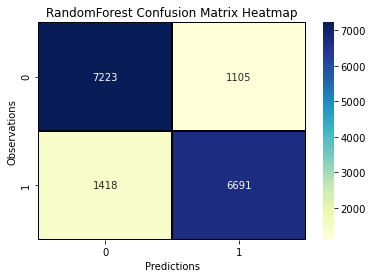

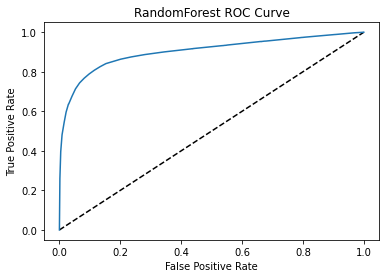

RandomForest Test Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      8328
         1.0       0.86      0.83      0.84      8109

    accuracy                           0.85     16437
   macro avg       0.85      0.85      0.85     16437
weighted avg       0.85      0.85      0.85     16437



In [98]:
Comparison.modelReportClass('RandomForest', rf, X_train2, y_train, X_test2, y_test, classReport=True)

In [110]:
rf_train_results = pd.concat([X_train, y_train], axis = 1)
rf_train_results['Prediccion'] = rf.predict(X_train2)
rf_train_results['Proba'] = rf.predict_proba(X_train2)[:,1]
rf_train_results.to_csv('Datasets/RF_Train_results.csv')

In [111]:
rf_train_results = pd.concat([X_test, y_test], axis = 1)
rf_train_results['Prediccion'] = rf.predict(X_test2)
rf_train_results['Proba'] = rf.predict_proba(X_test2)[:,1]
rf_train_results.to_csv('Datasets/RF_Test_results.csv')

In [178]:
pd.DataFrame({'Variable':rf.feature_importances_}, index = X.columns).sort_values('Variable', ascending = False)

,Variable
sch_https,0.133579
sch_http,0.117105
dom_len_sub,0.064109
dom_car_dif,0.062832
dom_len_tot,0.048391
metric_amazon,0.047532
metric_instagram,0.043844
dom_cons,0.041741
metric_facebook,0.041118
metric_wikipedia,0.040853


------------RandomForest------------

---------Train Metrics-----------
Accuracy = 0.9905370089360984
Sensibility = 0.9936909785011051
Specificity = 0.987058458538315
AUC = 0.9987742792486978

Confusion Matrix
[[22271   292]
 [  157 24728]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.9045772570176178
Sensibility = 0.9051751848280296
Specificity = 0.9039177450806595
AUC = 0.9665321416403564

Confusion Matrix
[[5099  542]
 [ 590 5632]]


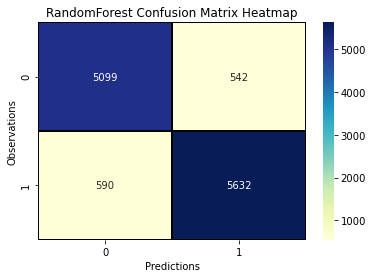

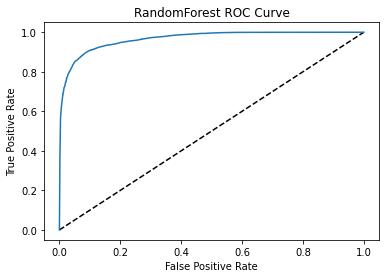

RandomForest Test Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      5641
         1.0       0.91      0.91      0.91      6222

    accuracy                           0.90     11863
   macro avg       0.90      0.90      0.90     11863
weighted avg       0.90      0.90      0.90     11863



In [228]:
Comparison.modelReportClass('RandomForest', rf, X_train, y_train, X_test, y_test, classReport=True)

------------GradBoost------------

---------Train Metrics-----------
Accuracy = 0.832353032226109
Sensibility = 0.8066160177271289
Specificity = 0.8569784346983281
AUC = 0.8963275573392218

Confusion Matrix
[[28294  4722]
 [ 6109 25481]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.8320331847449233
Sensibility = 0.8065332995695113
Specificity = 0.8564332444875212
AUC = 0.8946039299959878

Confusion Matrix
[[7069 1185]
 [1528 6370]]


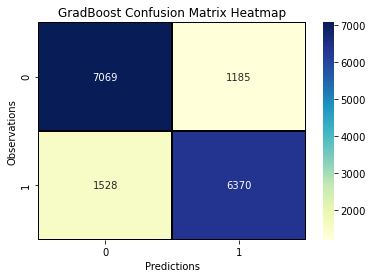

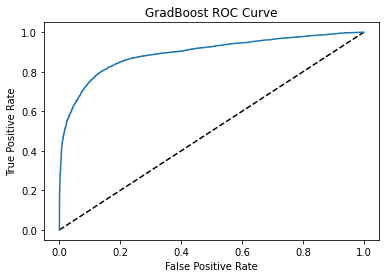

GradBoost Test Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      8254
         1.0       0.84      0.81      0.82      7898

    accuracy                           0.83     16152
   macro avg       0.83      0.83      0.83     16152
weighted avg       0.83      0.83      0.83     16152



In [147]:
Comparison.modelReportClass('GradBoost', gb, X_train, y_train, X_test, y_test, classReport=True)

------------Logistic------------

---------Train Metrics-----------
Accuracy = 0.809754511964833
Sensibility = 0.7781893004115227
Specificity = 0.8399563847831355
AUC = 0.8753354800952935

Confusion Matrix
[[27732  5284]
 [ 7007 24583]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.8081352154531947
Sensibility = 0.7760192453785768
Specificity = 0.8388660043615217
AUC = 0.8765966996947941

Confusion Matrix
[[6924 1330]
 [1769 6129]]


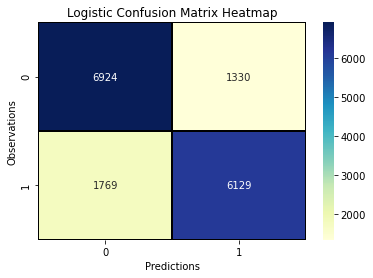

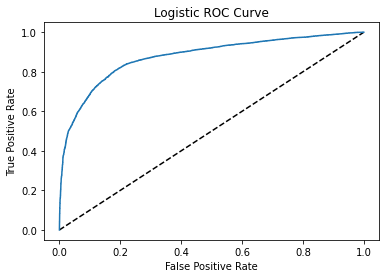

Logistic Test Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      8254
         1.0       0.82      0.78      0.80      7898

    accuracy                           0.81     16152
   macro avg       0.81      0.81      0.81     16152
weighted avg       0.81      0.81      0.81     16152



In [148]:
Comparison.modelReportClass('Logistic', logistic, X_train, y_train, X_test, y_test, classReport=True)